In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from modules import transfer_entropy as TE
from multiprocessing import Process

C:\Users\succa\anaconda3\lib\site-packages\tigramite\plotting.py:26: UserWarning: [Errno 2] No such file or directory: 'C:\\Users\\succa\\anaconda3\\lib\\site-packages\\tigramite\\..\\versions.py'
  warnings.warn(str(e))
C:\Users\succa\anaconda3\lib\site-packages\tigramite\independence_tests\gpdc.py:27: UserWarning: [Errno 2] No such file or directory: 'C:\\Users\\succa\\anaconda3\\lib\\site-packages\\tigramite\\independence_tests\\..\\..\\versions.py'
  warnings.warn(str(e))
C:\Users\succa\anaconda3\lib\site-packages\tigramite\independence_tests\gpdc_torch.py:33: UserWarning: No module named 'gpytorch'
  warnings.warn(str(e))


In [4]:
df = pd.read_csv("data/Times_series_sa_det.csv")
lista = ["Atlanta-Sandy Springs-Alpharetta, GA MSA",
    "Baltimore-Columbia-Towson, MD MSA",
    "Boston-Cambridge-Newton, MA-NH MSA",
    "Chicago-Naperville-Elgin, IL-IN-WI MSA",
    "Dallas-Fort Worth-Arlington, TX MSA",
    "Denver-Aurora-Lakewood, CO MSA",
    "Detroit_Dearborn, MI MSA",
    "Houston-The Woodlands-Sugar Land, TX MSA",
    "Los Angeles-Long Beach-Anaheim, CA MSA",
    "Miami-Fort Lauderdale-West Palm Beach, FL MSA",
    "Minneapolis-St. Paul-Bloomington, MN-WI MSA",
    "New York-Newark-Jersey City, NY-NJ-PA MSA",
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",
    "Phoenix-Mesa-Chandler, AZ MSA",
    "Riverside-San Bernardino-Ontario, CA MSA",
    "San Francisco-Oakland-Berkeley, CA MSA",
    "Tampa-St. Petersburg-Clearwater, FL MSA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"]

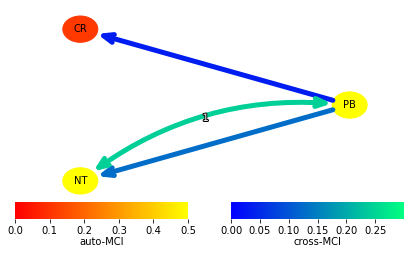

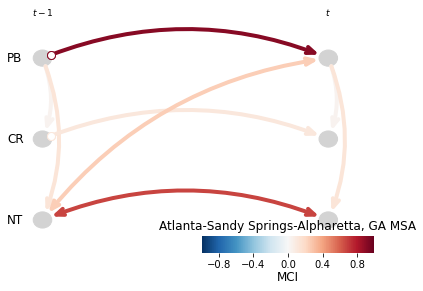

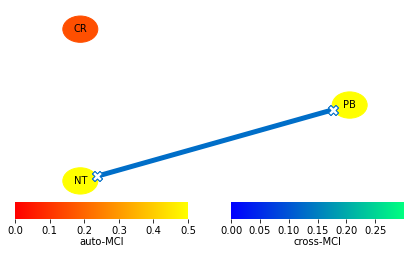

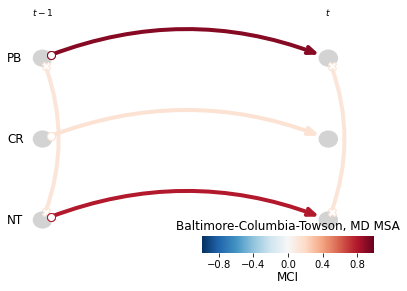

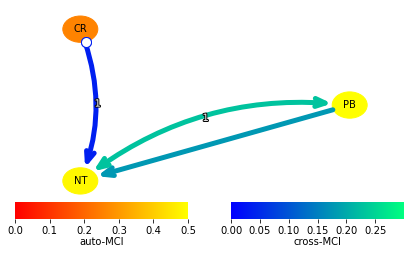

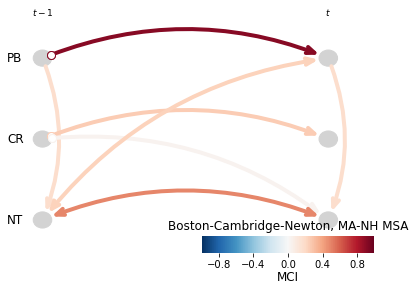

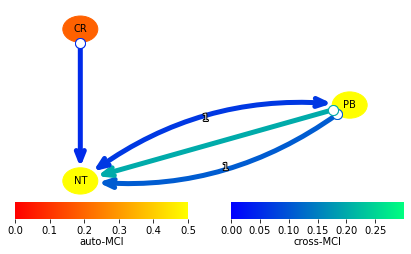

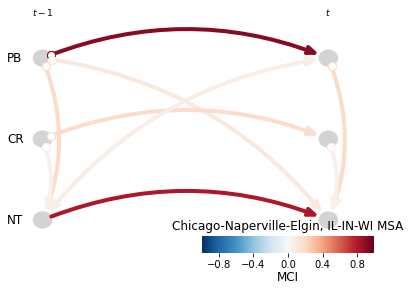

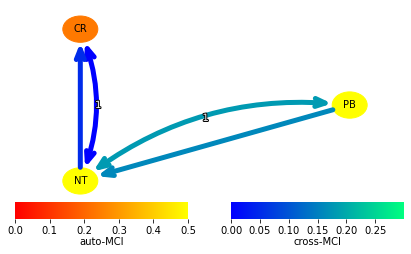

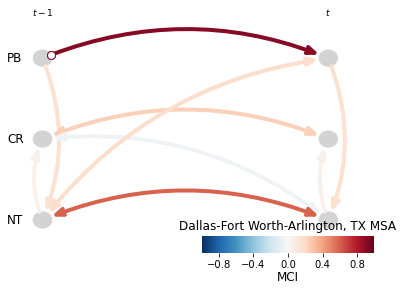

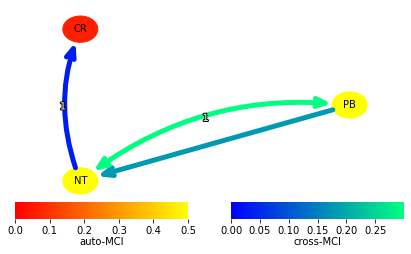

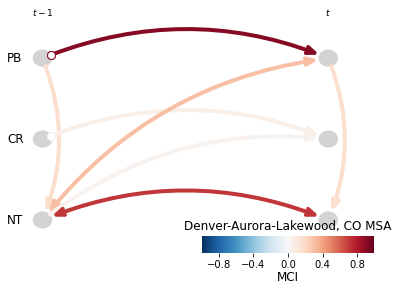

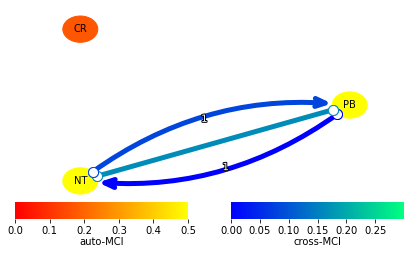

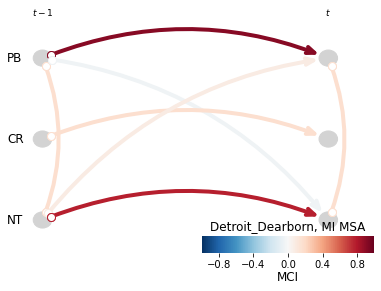

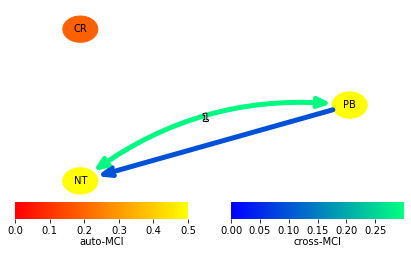

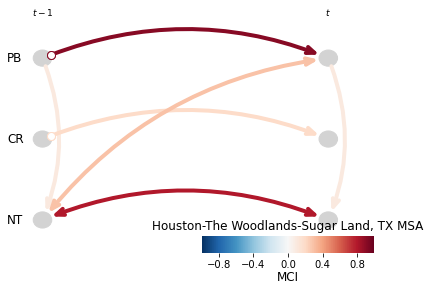

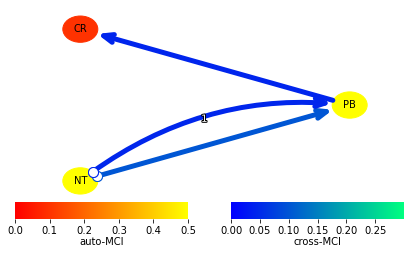

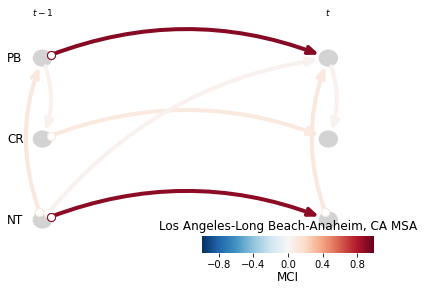

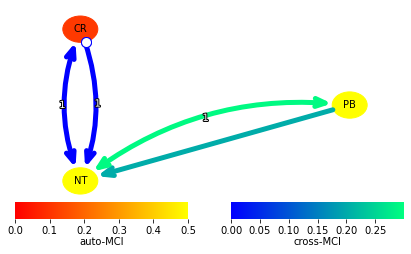

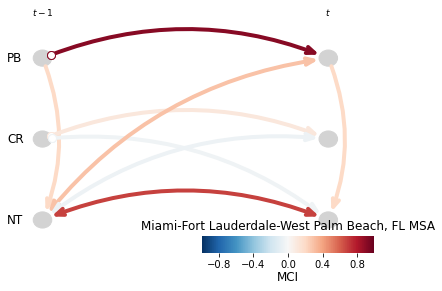

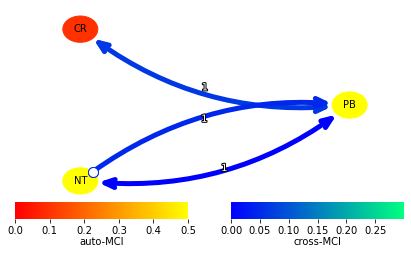

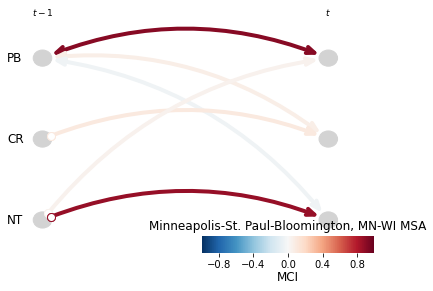

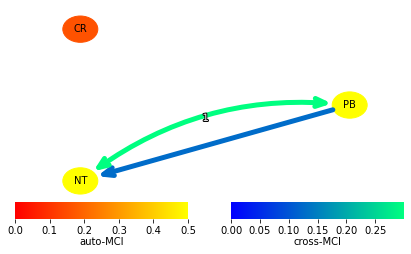

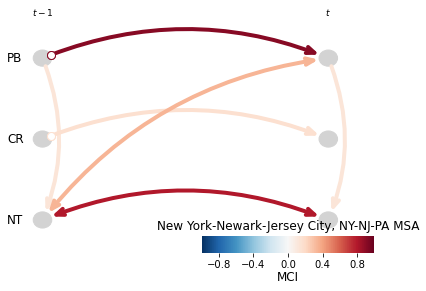

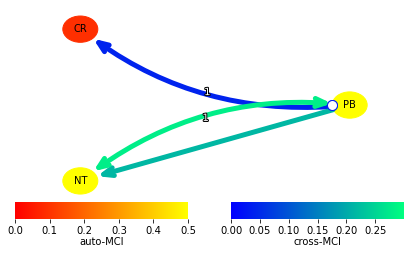

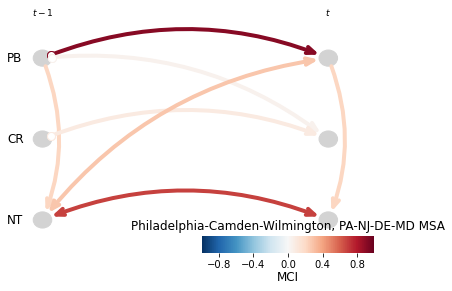

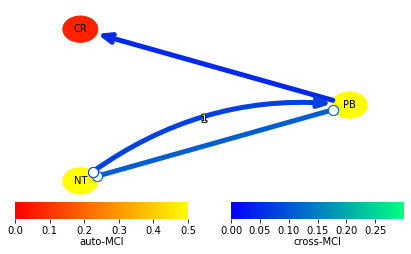

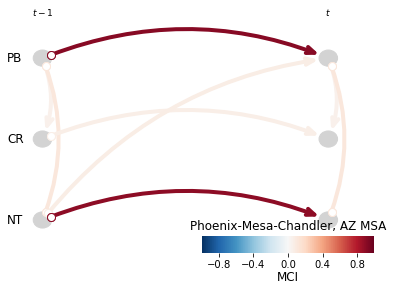

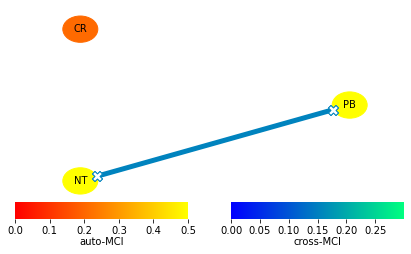

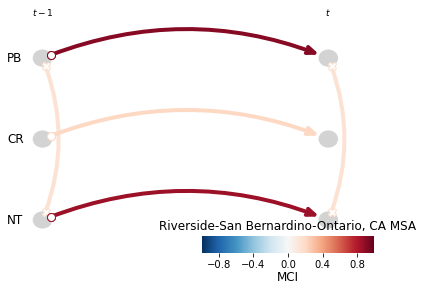

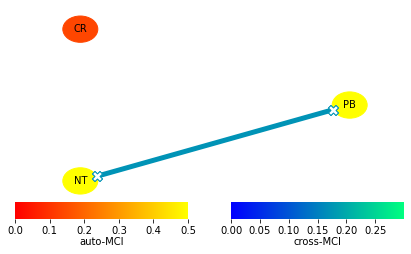

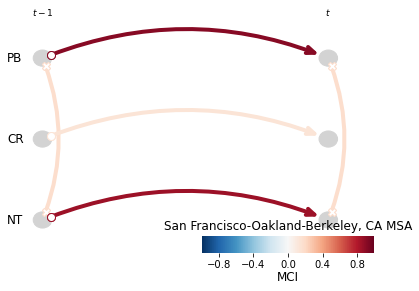

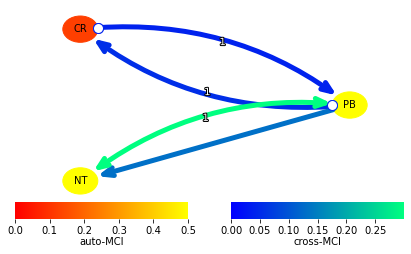

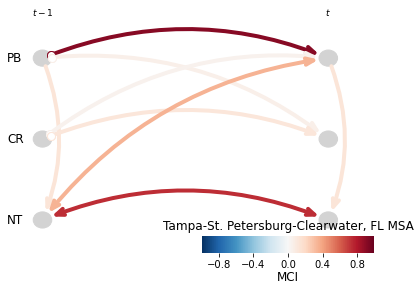

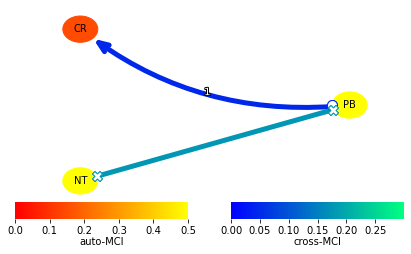

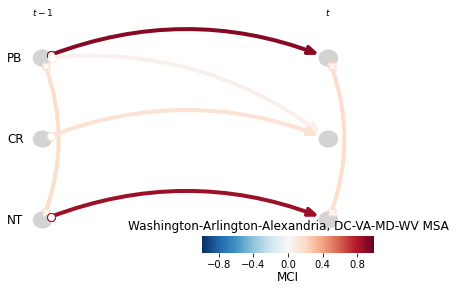

,area,rho,pvalue
0,"Atlanta-Sandy Springs-Alpharetta, GA MSA",0.1299,0.000
1,"Baltimore-Columbia-Towson, MD MSA",0.1294,0.000
2,"Boston-Cambridge-Newton, MA-NH MSA",0.1782,0.000
3,"Chicago-Naperville-Elgin, IL-IN-WI MSA",0.2005,0.000
4,"Dallas-Fort Worth-Arlington, TX MSA",0.1600,0.000
5,"Denver-Aurora-Lakewood, CO MSA",0.1793,0.000
6,"Detroit_Dearborn, MI MSA",0.1641,0.000
7,"Houston-The Woodlands-Sugar Land, TX MSA",0.0958,0.000
8,"Los Angeles-Long Beach-Anaheim, CA MSA",0.1016,0.000
9,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",0.2019,0.000


In [5]:
df_re = pd.DataFrame(columns=['area','rho', 'pvalue'])
for arg in lista:
    PT = df["Tweet search - "+arg+"_sent_Hugged_Positive_sa_det"]
    NT = df["Tweet search - "+arg+"_sent_Hugged_Negative_sa_det"]
    CR = df[arg+"_crimes_lagged_sa_det"] 
    PB = df["Police_Brutality_lagged_sa_det"]
    data = np.array([PB,CR,NT]).T
    T, N = data.shape
    var_names = ["PB", "CR","NT"]
    parcorr = ParCorr(significance='analytic')
    dataframe = pp.DataFrame(data,
                         datatime = np.arange(len(data)),
                         var_names=var_names)
    lpcmci = LPCMCI(dataframe=dataframe, 
                cond_ind_test=parcorr)
    
    results = lpcmci.run_lpcmci(tau_max=1,
                            pc_alpha=0.05)

    df_re.loc[len(df_re.index)] = [arg, round(results["val_matrix"][0][2,0],4),round(results["p_matrix"][0][2,0],4)] 
    tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='winter',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='autumn',
    );
    tp.plot_time_series_graph(
        figsize=(6, 4),
        val_matrix=results['val_matrix'],
        graph=results['graph'],
        var_names=var_names,
        link_colorbar_label='MCI',
        ); plt.title(arg); plt.show()
    #print(results)
df_re

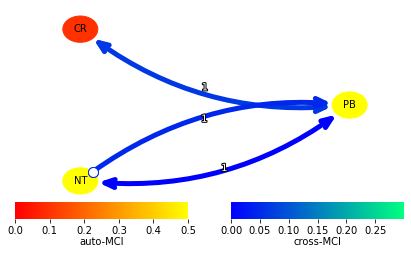

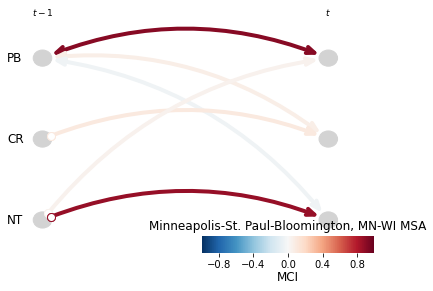

,area,rho,pvalue
0,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",0.0257,0.116


In [3]:
df = pd.read_csv("data/Times_series_sa_det.csv")
df_re = pd.DataFrame(columns=['area','rho', 'pvalue'])
for arg in ["Minneapolis-St. Paul-Bloomington, MN-WI MSA"]:
    PT = df["Tweet search - "+arg+"_sent_Hugged_Positive_sa_det"]
    NT = df["Tweet search - "+arg+"_sent_Hugged_Negative_sa_det"]
    CR = df[arg+"_crimes_lagged_sa_det"] 
    PB = df["Police_Brutality_lagged_sa_det"]
    data = np.array([PB,CR,NT]).T
    T, N = data.shape
    var_names = ["PB", "CR","NT"]
    parcorr = ParCorr(significance='analytic')
    dataframe = pp.DataFrame(data,
                         datatime = np.arange(len(data)),
                         var_names=var_names)
    lpcmci = LPCMCI(dataframe=dataframe, 
                cond_ind_test=parcorr)
    
    results = lpcmci.run_lpcmci(tau_max=1,
                            pc_alpha=0.05)

    df_re.loc[len(df_re.index)] = [arg, round(results["val_matrix"][0][2,0],4),round(results["p_matrix"][0][2,0],4)] 
    tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='winter',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='autumn',
    );
    tp.plot_time_series_graph(
        figsize=(6, 4),
        val_matrix=results['val_matrix'],
        graph=results['graph'],
        var_names=var_names,
        link_colorbar_label='MCI',
        ); plt.title(arg); plt.show()
    #print(results)
df_re

In [5]:
results["p_matrix"]

array([[[0.00000000e+00, 0.00000000e+00],
        [3.69245829e-01, 5.82006964e-05],
        [1.15973988e-01, 1.35382694e-02]],

       [[3.69245829e-01, 3.77238733e-01],
        [0.00000000e+00, 4.46518674e-09],
        [1.27537496e-01, 1.46548855e-01]],

       [[1.15973988e-01, 4.60317425e-03],
        [1.27537496e-01, 4.51038822e-01],
        [0.00000000e+00, 0.00000000e+00]]])

In [7]:
results["val_matrix"]

array([[[ 0.        ,  0.91104506],
        [-0.01468417,  0.06566729],
        [ 0.02570077, -0.0403634 ]],

       [[-0.01468417,  0.01443873],
        [ 0.        ,  0.09573049],
        [-0.02491598, -0.0237382 ]],

       [[ 0.02570077,  0.04632438],
        [-0.02491598, -0.01232276],
        [ 0.        ,  0.87240247]]])